In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [44]:
# Download the data file above and read it into a pandas DataFrame.
df = pd.read_csv("homes.csv")  
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [46]:
# Add the code necessary to describe the dataset
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


Sell      0
List      1
Living    1
Rooms     1
Beds      1
Baths     1
Age       1
Acres     1
Taxes     1
dtype: int64

Using markdown commentary describe the dataset:
The dataset includes information on 51 homes and 9 variables. Sell is the selling price, while predictors include List (listing price), Living (square feet), Rooms, Beds, Baths, Age, Acres, and Taxes. Most columns are numeric with only a few missing values. The data is mostly clean and ready for analysis.

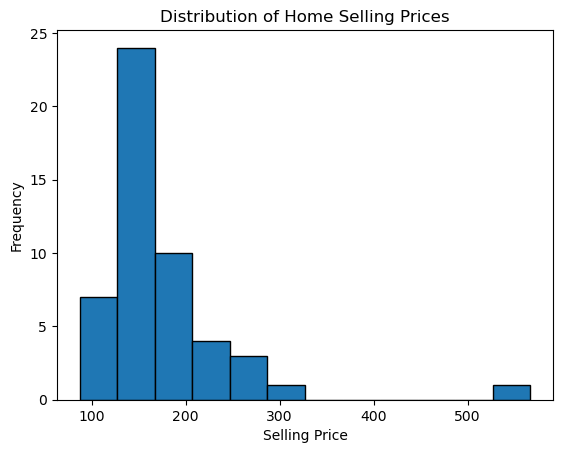

In [133]:
# Distribution of Sell
df["Sell"] = pd.to_numeric(df["Sell"], errors="coerce") # I had to add this code in using the help of ChatGPT to "fix" histogram
plt.hist(df["Sell"].dropna(), bins=12, edgecolor="black")
plt.title("Distribution of Home Selling Prices")
plt.xlabel("Selling Price"); plt.ylabel("Frequency")
plt.show()

Distribution of Home Selling Prices Explanation:
The distribution of selling prices is more right-skewed. As we can see, most homes sell between $100K–$200K, with only a few higher-priced homes in the $500K range. This highlights that there is more concentration of mid-range homes and only a few expensive outliers.

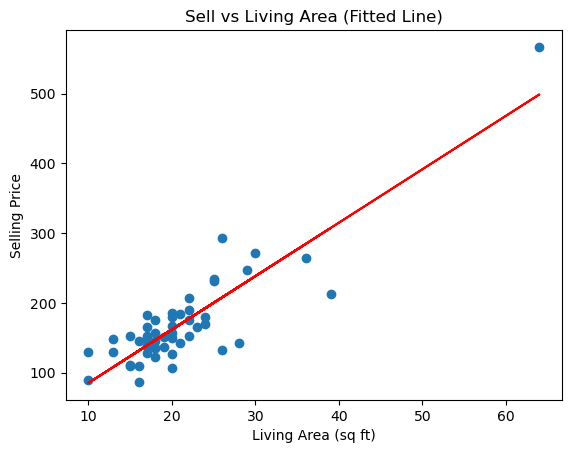

R-squared: 0.7733111192235564


In [139]:
# Relationship between Living Area and Selling Price
dat = df[["Living", "Sell"]].apply(pd.to_numeric, errors="coerce").dropna() # I used ChatGPT to fine-tune these 3 lines of code
x = dat[["Living"]]        
y = dat["Sell"]           


m = LinearRegression().fit(x, y)

plt.scatter(x["Living"], y)
plt.plot(x["Living"], m.predict(x), "r")
plt.title("Sell vs Living Area (Fitted Line)")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Selling Price")
plt.show()

print("R-squared:", m.score(x, y))

Relationship between Living Area and Selling Price Explanation:
The scatterplot shows a strong positive linear relationship between living area and selling price; as home size increases, selling price generally increases too. The fitted regression line confirms this upward trend. The R² value of approximately 0.77 indicates that about 77% of the variation in selling price can be explained by the area the home is located at. We can conclude that living area is a strong predictor of selling price in this dataset.

In [76]:
# Correlation matrix
corr = df.corr(numeric_only=True)
corr

,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
List,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


Correlation Matrix Explanation:
Listing price is strongly correlated with taxes (0.91) and living area (0.89), showing that larger homes tend to be pricier and taxed higher.
Living area also strong relationship to rooms (0.75) and baths (0.67), while age has weak or negative correlations with other variables.

Intercept: 16.871879102461804
Coefficient for Taxes: 0.04141499713918626
R-squared: 0.8088101825924694


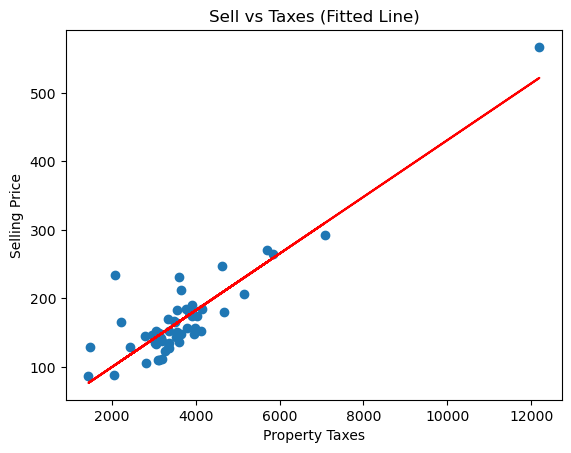

In [111]:
# Scatter and fitted line for Model1 (Sell and Taxes)
dat1 = df[["Taxes", "Sell"]].apply(pd.to_numeric, errors="coerce").dropna() 
x1 = dat1[["Taxes"]]         
y1 = dat1["Sell"]   


model1 = LinearRegression().fit(x1, y1)

print("Intercept:", model1.intercept_)
print("Coefficient for Taxes:", model1.coef_[0])
print("R-squared:", model1.score(x1, y1))



plt.scatter(x1["Taxes"], y1)
plt.plot(x1["Taxes"], model1.predict(x1), 'r')
plt.title("Sell vs Taxes (Fitted Line)")
plt.xlabel("Property Taxes")
plt.ylabel("Selling Price")
plt.show()

In [135]:
x1 = sm.add_constant(x1)
model1 = sm.OLS(y1, x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        21:17:51   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Commentary about the Important Statistics from the Model1 Output:

R² is about 0.81 which means that 81% of selling price variation is explained by taxes.
The Taxes coefficient is about 0.0414, we can say that Taxes have a strong, significant positive impact on selling price.
The intercept is 16.87 (p = 0.155), meaning that it's not statistically significant.
The F-statistic is about 203.1 (p < 0.001), which makes Model1 significant overall.

With all those stats in mind, we can conclude that higher property taxes are strongly related to higher selling prices, and Model1 explains most of the variation.

Intercept: 7.327395541707801
Coefficient for List: 0.9141673458466537
R-squared: 0.9948718455482516


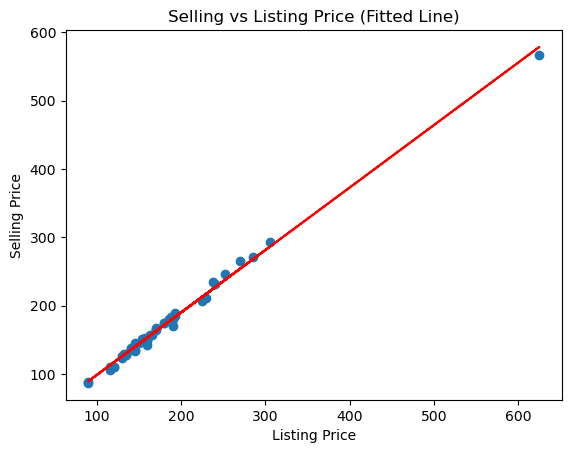

In [129]:
# Fit linear regression Model2 (Sell and List)
dat2 = df[["List", "Sell"]].apply(pd.to_numeric, errors="coerce").dropna() 
x2 = dat2[["List"]]         
y2 = dat2["Sell"] 


model2 = LinearRegression().fit(x2, y2)

print("Intercept:", model2.intercept_)
print("Coefficient for List:", model2.coef_[0])
print("R-squared:", model2.score(x2, y2))


# Scatter and fitted line for model2
plt.scatter(x2["List"], y)
plt.plot(x2["List"], model2.predict(x2), 'r')
plt.title("Selling vs Listing Price (Fitted Line)")
plt.xlabel("Listing Price")
plt.ylabel("Selling Price")
plt.show()

In [137]:
x2 = sm.add_constant(x2)
model2 = sm.OLS(y2, x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9312.
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           1.26e-56
Time:                        21:18:47   Log-Likelihood:                -152.97
No. Observations:                  50   AIC:                             309.9
Df Residuals:                      48   BIC:                             313.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3274      1.846      3.969      0.000       3.615      11.039
List           0.9142      0.009     96.499      0.000       0.895       0.933
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.119
Skew:                          -0.355   Prob(JB):                        0.572
Kurtosis:                       2.817   Cond. No.                         483.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Which model is "better"? What are some limitations of the model? 

R² for Model2 is about 0.995 which explains 99.5% of selling price variation.
The List coefficient is about 0.9142 (p < 0.001), indicating a strong, significant positive relationship.
The intercept is about 7.33 (p < 0.001), which is small but not really meaningful.

Compared to the Sell–Taxes Model1 (R² = 0.81), the Sell–List Model2 (R² = 0.995) has a better fit. However, the too-perfect R² makes me skeptical. This can be caused if there is a possible overlap between listing and selling prices. Also, we can see that Model2 is limited since we are excluding other factors/variables like size or location. 

In conclusion, listing price strongly predicts selling price but might not indicate "true" causation.